
[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


                               Open      High       Low     Close  Volume  \
time                                                                        
2025-11-13 02:45:00+08:00  4208.473  4209.941  4206.827  4207.870    1128   
2025-11-13 02:50:00+08:00  4207.921  4209.215  4206.917  4208.592    1162   
2025-11-13 02:55:00+08:00  4208.617  4210.464  4206.574  4206.899    1120   
2025-11-13 03:00:00+08:00  4206.927  4210.099  4206.893  4208.264    1125   
2025-11-13 03:05:00+08:00  4208.231  4209.867  4204.831  4206.776    1314   

                           spread  real_volume   Delta  
time                                                    
2025-11-13 02:45:00+08:00     160            0 -1128.0  
2025-11-13 02:50:00+08:00     160            0  1162.0  
2025-11-13 02:55:00+08:00     160            0 -1120.0  
2025-11-13 03:00:00+08:00     160            0  1125.0  
2025-11-13 03:05:00+08:00     160            0 -1314.0  


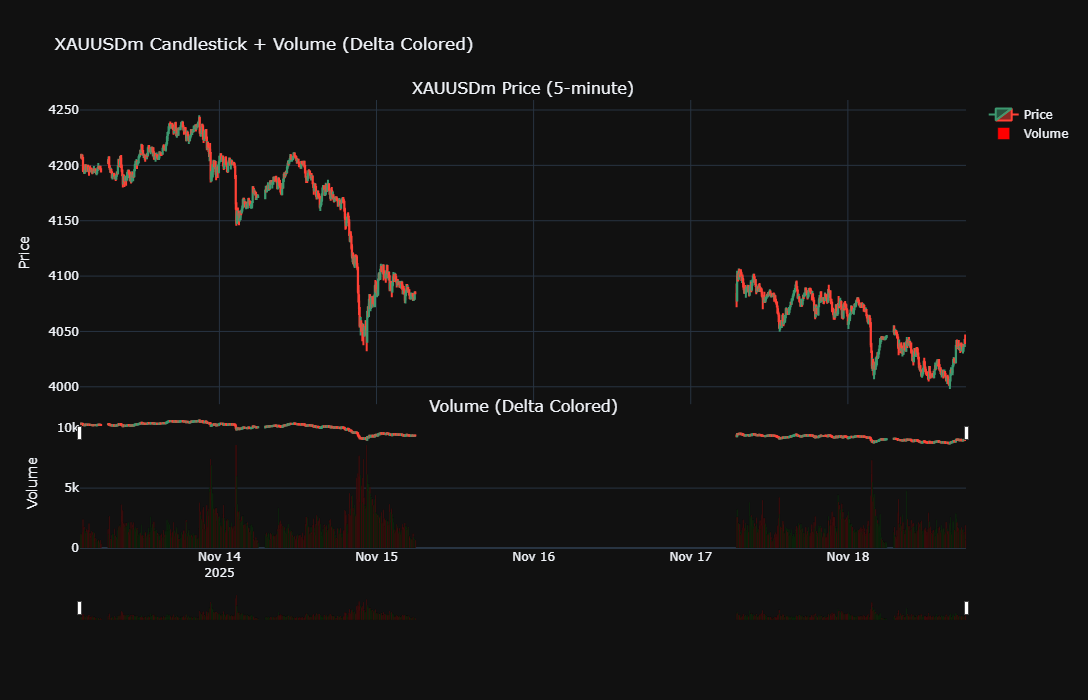

In [9]:
# Install dependencies if needed
!pip install MetaTrader5 plotly pandas --quiet

# -----------------------------
# IMPORTS
# -----------------------------
import MetaTrader5 as mt
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# -----------------------------
# 1. CONNECT TO MT5
# -----------------------------
if not mt.initialize():
    raise RuntimeError("MT5 initialization failed")

symbol = "XAUUSDm"           # Change to your broker's symbol
timeframe = mt.TIMEFRAME_M5  # 5-minute candles
num_candles = 1000            # Number of candles to fetch

# Map MT5 timeframe constant to readable string
timeframe_map = {
    mt.TIMEFRAME_M1: "1-minute",
    mt.TIMEFRAME_M5: "5-minute",
    mt.TIMEFRAME_M15: "15-minute",
    mt.TIMEFRAME_M30: "30-minute",
    mt.TIMEFRAME_H1: "1-hour",
    mt.TIMEFRAME_H4: "4-hour",
    mt.TIMEFRAME_D1: "1-day",
}
timeframe_str = timeframe_map.get(timeframe, str(timeframe))

# -----------------------------
# 2. FETCH DATA
# -----------------------------
rates = mt.copy_rates_from_pos(symbol, timeframe, 0, num_candles)
df = pd.DataFrame(rates)

# Convert MT5 time (UTC) to datetime
df['time'] = pd.to_datetime(df['time'], unit='s', utc=True)
df['time'] = df['time'].dt.tz_convert('Asia/Manila')
df.set_index('time', inplace=True)

# OHLC + tick volume
df.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'tick_volume': 'Volume'
}, inplace=True)

# Simple delta
df['Delta'] = df.apply(
    lambda row: row['Volume'] if row['Close'] > row['Open'] 
    else (-row['Volume'] if row['Close'] < row['Open'] else 0),
    axis=1
)

print(df.head())

# -----------------------------
# 3. CHART PLOTTING
# -----------------------------

# create plotly figure with two panes
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    row_heights=[0.7, 0.3],
    subplot_titles=(f'{symbol} Price ({timeframe_str})', 'Volume (Delta Colored)')
)

# Candlestick trace (top pane)
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Price'
), row=1, col=1)

# Volume trace (bottom pane), colored by delta
colors = ['green' if d > 0 else ('red' if d < 0 else 'gray') for d in df['Delta']]
fig.add_trace(go.Bar(
    x=df.index,
    y=df['Volume'],
    marker_color=colors,
    name='Volume'
), row=2, col=1)

# layout
fig.update_layout(
    title=f'{symbol} Candlestick + Volume (Delta Colored)',
    template='plotly_dark',
    height=700
)

# Set axis labels
fig.update_yaxes(title_text="Price", row=1, col=1)
fig.update_yaxes(title_text="Volume", row=2, col=1)

# Enable scrollable slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeslider_thickness=0.05
)

fig.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8012\3006656137.py:71: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



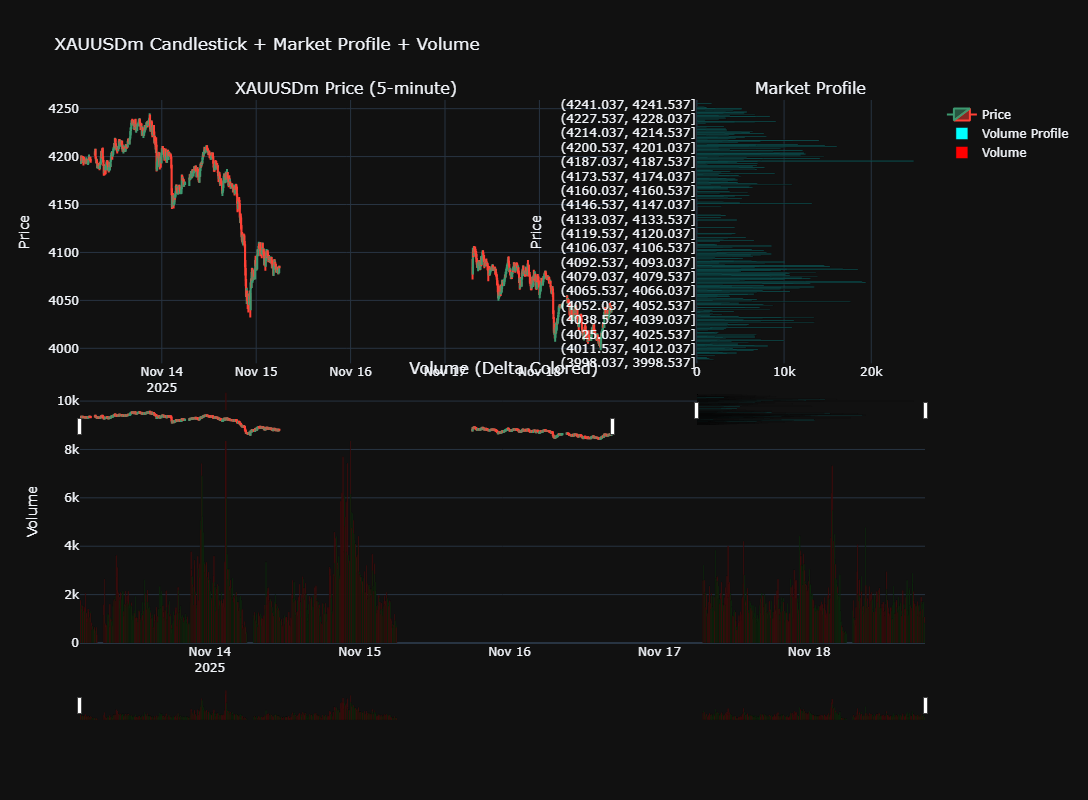

In [14]:
# -----------------------------
# INSTALL DEPENDENCIES IF NEEDED
# -----------------------------
# !pip install MetaTrader5 plotly pandas --quiet

# -----------------------------
# IMPORTS
# -----------------------------
import MetaTrader5 as mt
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# -----------------------------
# 1. CONNECT TO MT5
# -----------------------------
if not mt.initialize():
    raise RuntimeError("MT5 initialization failed")

symbol = "XAUUSDm"           # Change to your broker's symbol
timeframe = mt.TIMEFRAME_M5  # 5-minute candles
num_candles = 1000           # Number of candles to fetch

# Map MT5 timeframe constant to readable string
timeframe_map = {
    mt.TIMEFRAME_M1: "1-minute",
    mt.TIMEFRAME_M5: "5-minute",
    mt.TIMEFRAME_M15: "15-minute",
    mt.TIMEFRAME_M30: "30-minute",
    mt.TIMEFRAME_H1: "1-hour",
    mt.TIMEFRAME_H4: "4-hour",
    mt.TIMEFRAME_D1: "1-day",
}
timeframe_str = timeframe_map.get(timeframe, str(timeframe))

# -----------------------------
# 2. FETCH DATA
# -----------------------------
rates = mt.copy_rates_from_pos(symbol, timeframe, 0, num_candles)
df = pd.DataFrame(rates)

# Convert MT5 time (UTC) to datetime
df['time'] = pd.to_datetime(df['time'], unit='s', utc=True)
df['time'] = df['time'].dt.tz_convert('Asia/Manila')
df.set_index('time', inplace=True)

# Rename columns
df.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'tick_volume': 'Volume'
}, inplace=True)

# Simple delta
df['Delta'] = df.apply(
    lambda row: row['Volume'] if row['Close'] > row['Open'] 
    else (-row['Volume'] if row['Close'] < row['Open'] else 0),
    axis=1
)

# -----------------------------
# 3. MARKET PROFILE DATA
# -----------------------------
# Define price bins
bin_size = 0.5  # Adjust to your market (XAUUSD = $0.5 per bin)
price_bins = pd.interval_range(start=df['Low'].min(), end=df['High'].max() + bin_size, freq=bin_size)

# Compute volume per price bin
volume_profile = df.groupby(pd.cut(df['Close'], bins=price_bins))['Volume'].sum()

# -----------------------------
# 4. PLOTLY FIGURE
# -----------------------------
fig = make_subplots(
    rows=2, cols=2,
    shared_xaxes=True,
    vertical_spacing=0.03,
    column_widths=[0.7, 0.3],
    specs=[[{"colspan": 1}, {"type": "xy"}],
           [{"colspan": 2}, None]],
    subplot_titles=(f'{symbol} Price ({timeframe_str})', 'Market Profile', 'Volume (Delta Colored)')
)

# --- Candlestick trace (top-left) ---
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Price'
), row=1, col=1)

# --- Market Profile (top-right) ---
fig.add_trace(go.Bar(
    y=[str(i) for i in volume_profile.index],
    x=volume_profile.values,
    orientation='h',
    marker_color='cyan',
    name='Volume Profile'
), row=1, col=2)

# --- Volume (bottom, delta-colored) ---
colors = ['green' if d > 0 else ('red' if d < 0 else 'gray') for d in df['Delta']]
fig.add_trace(go.Bar(
    x=df.index,
    y=df['Volume'],
    marker_color=colors,
    name='Volume'
), row=2, col=1)

# --- Layout ---
fig.update_layout(
    title=f'{symbol} Candlestick + Market Profile + Volume',
    template='plotly_dark',
    height=800
)

# Y-axis labels
fig.update_yaxes(title_text="Price", row=1, col=1)
fig.update_yaxes(title_text="Price", row=1, col=2)
fig.update_yaxes(title_text="Volume", row=2, col=1)

# Enable scrollable slider for candlestick and volume
fig.update_xaxes(rangeslider_visible=True, rangeslider_thickness=0.05)

# author trademark
fig.update_layout(
    title=f'{symbol} Candlestick + Market Profile + Volume<br><i>algorembrant</i>',
    template='plotly_dark',
    height=800
)

fig.show()
